In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Read multiple csv files
#Import file path from "Food-Data-Group 1.csv" to "Food-Data-Group 5.csv" 
files = glob.glob('FOOD-DATA-GROUP*.csv')  
dataframes = []

for file in files:
    df = pd.read_csv(file)  
    dataframes.append(df)  

#Combine all data frames into one
combined_df = pd.concat(dataframes, ignore_index=True)

#Choose only the top 5 essential nutrient columns and Caloric Value
nutrients = combined_df[['food', 'Caloric Value', 'Fat', 'Carbohydrates', 'Protein', 'Water', 'Vitamin C']]

print(nutrients)




                                  food  Caloric Value   Fat  Carbohydrates  \
0                         cream cheese             51   5.0            0.8   
1                    neufchatel cheese            215  19.4            3.1   
2     requeijao cremoso light catupiry             49   3.6            0.9   
3                       ricotta cheese             30   2.0            1.5   
4                 cream cheese low fat             30   2.3            1.2   
...                                ...            ...   ...            ...   
2390             muesli master crumble            124   2.4            4.5   
2391                       bran flakes            131   0.8           32.2   
2392                        nut cereal            245   5.9           46.2   
2393                       corn flakes            108   0.3           24.6   
2394                    corn grits dry             36   0.2            7.7   

      Protein  Water  Vitamin C  
0         0.9    7.6      0.0

In [2]:
#Calculate average after grouping by 'food' column
grouped = nutrients.groupby('food').agg({
    'Caloric Value': 'mean',
    'Fat': 'mean',
    'Carbohydrates': 'mean',
    'Protein': 'mean',
    'Water': 'mean',
    'Vitamin C': 'mean'
}).reset_index()

#Grouped Results Output
print(grouped)

                      food  Caloric Value    Fat  Carbohydrates  Protein  \
0                  abalone           89.0  0.600            5.1   14.500   
1                  abiyuch          157.0  0.200           40.1    3.400   
2           acerola cherry            2.0  0.052            0.4    0.079   
3     acerola cherry juice           56.0  0.700           11.6    1.000   
4              acorn dried          144.0  8.900           15.2    2.300   
...                    ...            ...    ...            ...      ...   
2390        zaziki milfina           51.0  4.400            0.0    0.000   
2391    zinfandel red wine          129.0  0.000            4.2    0.100   
2392       zucchini cooked           27.0  0.600            4.8    2.100   
2393          zucchini raw           44.0  0.800            8.1    3.100   
2394              zwieback           30.0  0.700            5.2    0.700   

      Water  Vitamin C  
0      63.4      1.700  
1     182.2    123.300  
2       4.4 

In [3]:
#Filtering Low Calorie Foods using grouped DataFrame
low_calorie_foods= grouped[grouped['Caloric Value'] < 100]
print("Low Calorie Foods:\n", low_calorie_foods)

Low Calorie Foods:
                           food  Caloric Value    Fat  Carbohydrates  Protein  \
0                      abalone           89.0  0.600            5.1   14.500   
2               acerola cherry            2.0  0.052            0.4    0.079   
3         acerola cherry juice           56.0  0.700           11.6    1.000   
12    after eight mints nestle           36.0  1.000            6.7    0.100   
13                        agar            1.0  0.058            0.3    0.053   
...                        ...            ...    ...            ...      ...   
2388        yuca cassava chips            9.0  0.400            1.2    0.054   
2390            zaziki milfina           51.0  4.400            0.0    0.000   
2392           zucchini cooked           27.0  0.600            4.8    2.100   
2393              zucchini raw           44.0  0.800            8.1    3.100   
2394                  zwieback           30.0  0.700            5.2    0.700   

        Water  Vita

In [4]:
#Filtering Top 10 Foods with the highest Vitamin C content
grouped_VitaminC = nutrients.groupby('food').agg({
    'Vitamin C': 'mean'
}).reset_index()

top_vitaminC_foods = grouped_VitaminC.nlargest(10, 'Vitamin C')
print(top_vitaminC_foods[['food', 'Vitamin C']])

                              food  Vitamin C
3             acerola cherry juice     3872.0
1781                     rose hips      541.0
873   fruit walnut salad mcdonalds      383.6
978             guava sauce cooked      348.4
2048          sweet yellow peppers      341.3
225                 black currants      202.7
1293           mustard spinach raw      195.0
1790                  rutabaga raw      193.0
2042         sweet red peppers raw      190.3
47         apple dippers mcdonalds      188.4


In [5]:
#Analyzing the relative weight of protein in high-calorie foods 
#by filtering foods over 200 calories and calculating the protein ratio of these foods

#Filtering foods with more than 200 calories
high_calorie_foods = grouped[grouped['Caloric Value'] >= 200]

#Statistical calculation
high_calorie_stats = high_calorie_foods.agg({
    'Caloric Value': ['mean', 'max', 'min'],
    'Fat': ['mean', 'max', 'min'],
    'Protein': ['mean', 'max', 'min'],
    'Water': ['mean', 'max', 'min']
})

print(high_calorie_stats)

#Filtering out zero Caloric Value to avoid division by zero
non_zero = grouped[grouped['Caloric Value'] > 0]

#Calculation of the ratio of protein to calories in each food
non_zero['Protein Ratio'] = non_zero['Protein'] / non_zero['Caloric Value']

#Statistical analysis by percentage
protein_ratio_stats = non_zero.agg({
    'Protein Ratio': ['mean', 'max', 'min']
})

print(protein_ratio_stats)



      Caloric Value         Fat     Protein        Water
mean     533.926166   26.536939   33.177012   125.376509
max     6077.000000  550.700000  560.300000  1875.900000
min      200.000000    0.000000    0.000000     0.000000
      Protein Ratio
mean       0.056499
max        1.250000
min        0.000000


/var/folders/zy/fdd26yv53rv42pp35gx53cch0000gn/T/ipykernel_17643/1539948206.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero['Protein Ratio'] = non_zero['Protein'] / non_zero['Caloric Value']


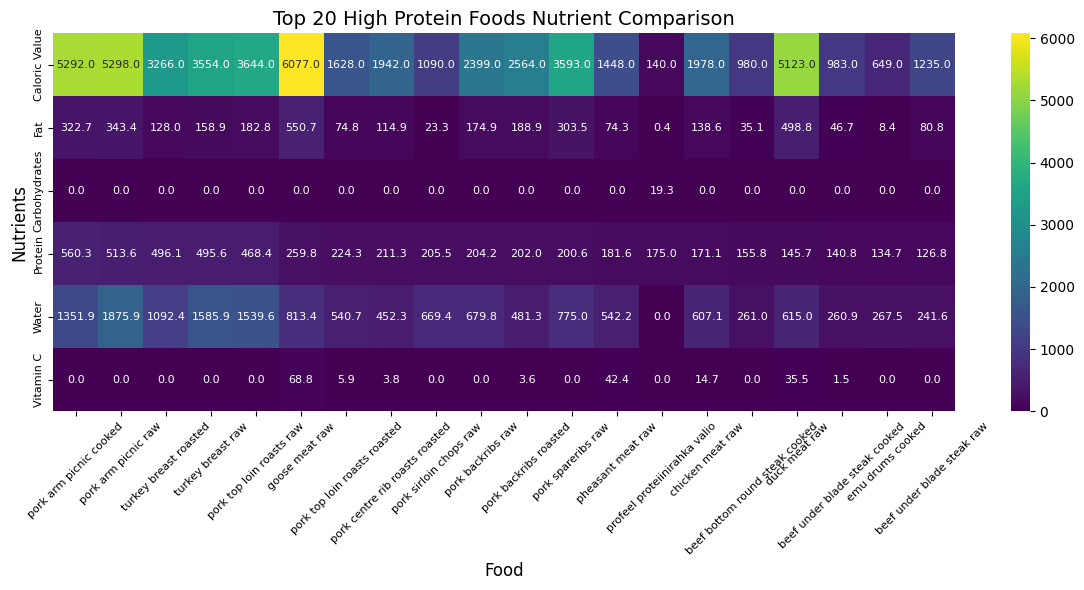

In [6]:
# The process of selecting the top 20 foods with the highest protein content 
# and visualizing their nutrients in the form of a heat map
top_n = 20
top_protein = grouped.nlargest(top_n, 'Protein')

# Visualization of heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(
    top_protein.set_index('food').T, 
    annot=True, 
    cmap='viridis', 
    fmt='.1f',
    annot_kws={"size": 8}  
)

plt.title('Top 20 High Protein Foods Nutrient Comparison', fontsize=14) 
plt.xlabel('Food', fontsize=12)  
plt.ylabel('Nutrients', fontsize=12)  
plt.xticks(rotation=45, fontsize=8)  
plt.yticks(fontsize=8) 
plt.tight_layout() 
plt.show()


In [7]:
#Group foods according to fat content, and calculate the mean calorie, protein, 
#and carbohydrate values for each group
grouped_copy = grouped.copy()

#Group by fat
bins = [0, 5, 15, 30, float('inf')]
labels = ['Low Fat', 'Medium Fat', 'High Fat', 'Very High Fat']
grouped_copy['Fat Group'] = pd.cut(grouped_copy['Fat'], bins=bins, labels=labels)

#Calculate the mean after grouping
fat_grouped = grouped_copy.groupby('Fat Group').agg({
    'Caloric Value': 'mean',
    'Protein': 'mean',
    'Carbohydrates': 'mean'
})

print(fat_grouped)


               Caloric Value    Protein  Carbohydrates
Fat Group                                             
Low Fat           105.677374   5.838646      18.124830
Medium Fat        216.503226  14.063013      16.606910
High Fat          389.139303  26.291045      23.912169
Very High Fat    1101.210227  67.144886      25.306341


/var/folders/zy/fdd26yv53rv42pp35gx53cch0000gn/T/ipykernel_17643/3827044307.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fat_grouped = grouped_copy.groupby('Fat Group').agg({


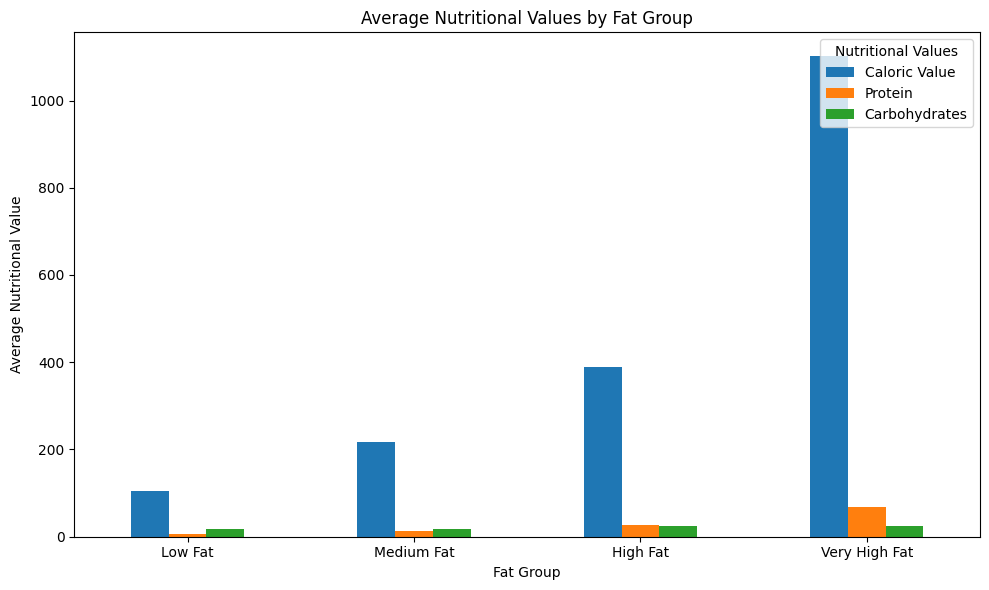

In [ ]:
# Visualize bar graphs
fat_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Nutritional Values by Fat Group')
plt.xlabel('Fat Group')
plt.ylabel('Average Nutritional Value')
plt.xticks(rotation=0)
plt.legend(title='Nutritional Values', loc='upper right')
plt.tight_layout()
plt.show()


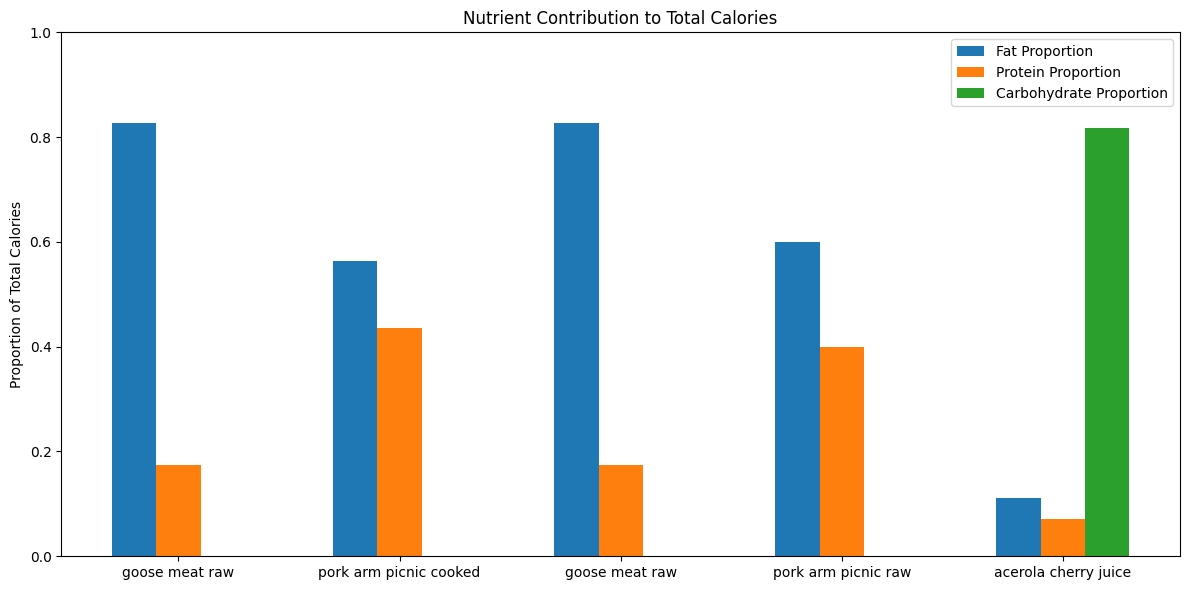

In [9]:
#Select foods that have the maximum value of each nutrient 
#and visualize the percentage of those nutrients to calories

#calculation of calories
grouped['Fat Calories'] = grouped['Fat'] * 9
grouped['Protein Calories'] = grouped['Protein'] * 4
grouped['Carbohydrate Calories'] = grouped['Carbohydrates'] * 4

#Calculation of total calories
grouped['Total Calories'] = (
    grouped['Fat Calories'] + 
    grouped['Protein Calories'] + 
    grouped['Carbohydrate Calories']
)

#Select foods with maximum values for each nutrient
max_caloric_food = grouped.loc[grouped['Total Calories'].idxmax()]
max_protein_food = grouped.loc[grouped['Protein'].idxmax()]
max_fat_food = grouped.loc[grouped['Fat'].idxmax()]
max_water_food = grouped.loc[grouped['Water'].idxmax()]
max_vitamin_c_food = grouped.loc[grouped['Vitamin C'].idxmax()]

#Create a new data frame with selected foods
selected_foods = pd.DataFrame([max_caloric_food, max_protein_food, max_fat_food, max_water_food, max_vitamin_c_food])

#Calculate the percentage of each nutrient contributing to total calories
selected_foods['Fat Proportion'] = selected_foods['Fat Calories'] / selected_foods['Total Calories']
selected_foods['Protein Proportion'] = selected_foods['Protein Calories'] / selected_foods['Total Calories']
selected_foods['Carbohydrate Proportion'] = selected_foods['Carbohydrate Calories'] / selected_foods['Total Calories']

#Visualization: bar graphs
plt.figure(figsize=(12, 6))

bar_width = 0.2
x = np.arange(len(selected_foods))

plt.bar(x - bar_width, selected_foods['Fat Proportion'], bar_width, label='Fat Proportion')
plt.bar(x, selected_foods['Protein Proportion'], bar_width, label='Protein Proportion')
plt.bar(x + bar_width, selected_foods['Carbohydrate Proportion'], bar_width, label='Carbohydrate Proportion')

plt.ylabel('Proportion of Total Calories')
plt.title('Nutrient Contribution to Total Calories')
plt.xticks(x, selected_foods['food'])
plt.legend()
plt.tight_layout()
plt.ylim(0, 1)  
plt.show()


Correlation between Water and Vitamin C: 0.0768603880830681


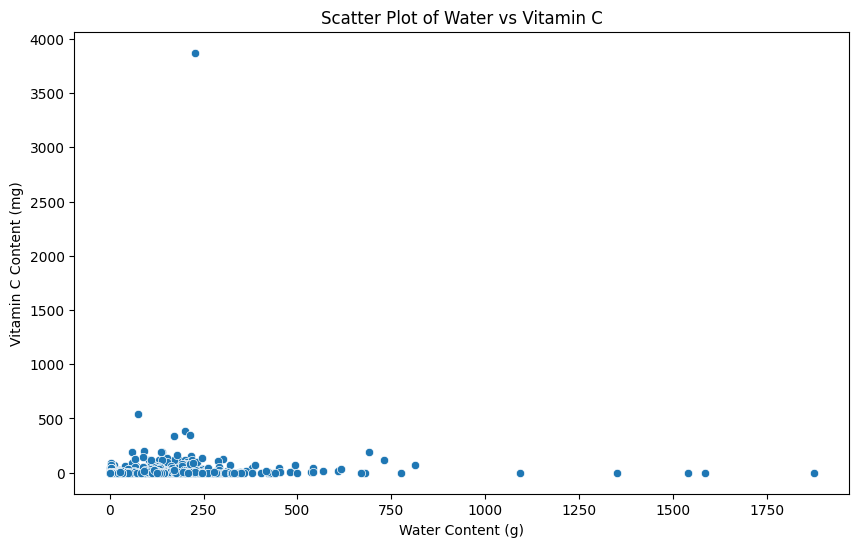

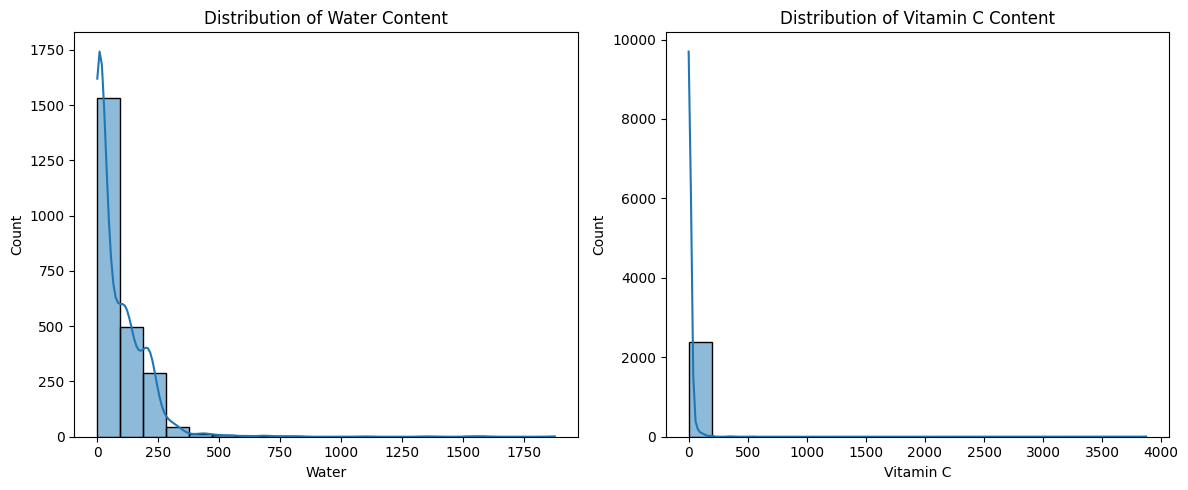

In [10]:
#Analyzing the relationship between the two nutrients(Water, Vitamin C), 
#and how each nutrient is distributed

grouped = grouped.dropna(subset=['Water', 'Vitamin C'])

#Calculate correlation
correlation = grouped[['Water', 'Vitamin C']].corr().iloc[0, 1]
print(f'Correlation between Water and Vitamin C: {correlation}')

#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped, x='Water', y='Vitamin C')
plt.title('Scatter Plot of Water vs Vitamin C')
plt.xlabel('Water Content (g)')
plt.ylabel('Vitamin C Content (mg)')
plt.show()

#Histogram for Water and Vitamin C
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(grouped['Water'], bins=20, kde=True)
plt.title('Distribution of Water Content')

plt.subplot(1, 2, 2)
sns.histplot(grouped['Vitamin C'], bins=20, kde=True)
plt.title('Distribution of Vitamin C Content')

plt.tight_layout()
plt.show()


R²: 0.84
Recommended Nutrient Foods:
                                             food     Score  \
1172                                lupins cooked  4.673329   
755                                edamame cooked  9.502631   
314   caesar salad with grilled chicken mcdonalds  9.636389   

      Predicted Calories  
1172          182.800000  
755           173.163333  
314           195.140000  

Recommended Foods for Vitamin C and Water:
                    food  Vitamin C  Water
3   acerola cherry juice     3872.0  228.2
8       acorn squash raw       47.4  378.3
74      asparagus canned       67.8  387.7


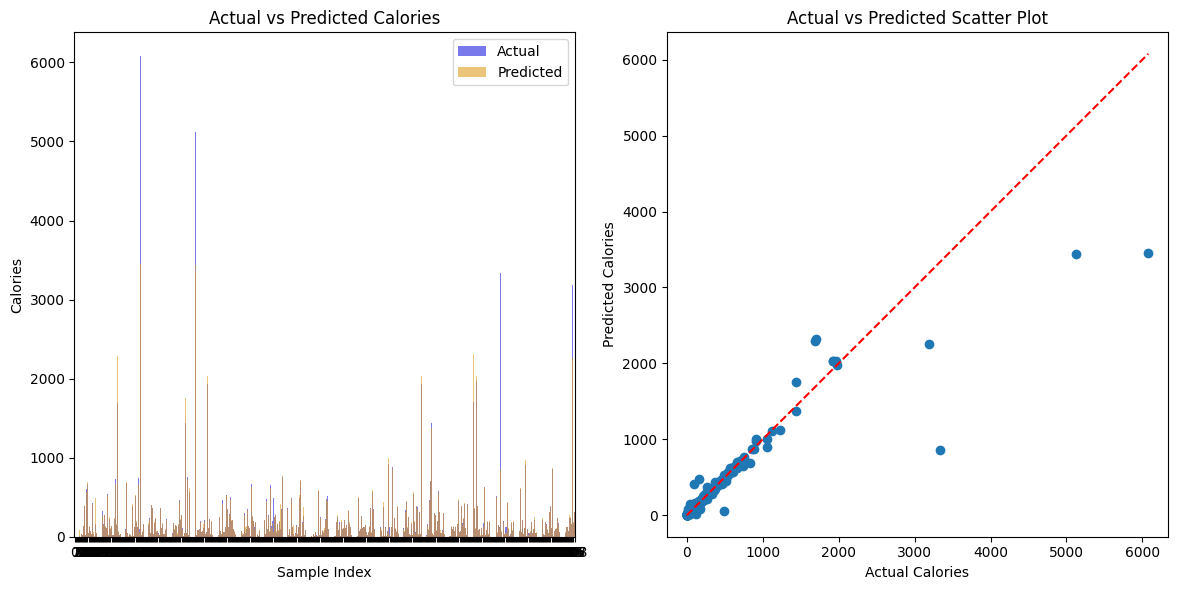

In [ ]:
#Machine learning models predict calories based on nutrient information in food,
#use this to recommend the best food for your nutrient goals
#in other words, it is recommended to eat foods that meet the nutrients desired by the user but have low calories

#Input properties
X = grouped[['Fat', 'Carbohydrates', 'Protein']] 
y = grouped['Caloric Value']  # 목표 변수

#Data segmentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Learning a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Prediction and evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')

#Specific nutrient objectives set by the user
target_nutrients = {
    'Protein': 25,
    'Fat': 5,
    'Carbohydrates': 20,
    'Vitamin C': 30, 
    'Water': 200     
}

#Define similarity calculation functions -> The lower the score, the better
def calculate_similarity(food_df, target_nutrients):
    food_df['Score'] = np.sqrt(
        (food_df['Protein'] - target_nutrients['Protein']) ** 2 +
        (food_df['Fat'] - target_nutrients['Fat']) ** 2 +
        (food_df['Carbohydrates'] - target_nutrients['Carbohydrates']) ** 2
    )
    return food_df

#Calculate scores using predicted calories
grouped['Predicted Calories'] = model.predict(grouped[['Fat', 'Carbohydrates', 'Protein']])
food_with_scores = calculate_similarity(grouped, target_nutrients)

#Definition of recommended food selection function 
#(based on nutritional goals and low calories)
def recommend_nutrient_foods(food_df, top_n=3):
    #Choose lowcalorie foods with the lowest scores
    recommended = food_df.nsmallest(top_n, 'Score')
    return recommended[['food', 'Score', 'Predicted Calories']]

#Recommended food
recommended_nutrient_foods = recommend_nutrient_foods(food_with_scores)
print("Recommended Nutrient Foods:")
print(recommended_nutrient_foods)

#Recommended foods for vitamin C and water 
def recommend_vitamin_water_foods(food_df, vitamin_c_target, water_target, top_n=3):
    vitamin_water_foods = food_df[(food_df['Vitamin C'] >= vitamin_c_target) & (food_df['Water'] >= water_target)]
    return vitamin_water_foods[['food', 'Vitamin C', 'Water']].head(top_n)

#Recommended foods for vitamin C and water
recommended_vitamin_water_foods = recommend_vitamin_water_foods(grouped, target_nutrients['Vitamin C'], target_nutrients['Water'])
print("\nRecommended Foods for Vitamin C and Water:")
print(recommended_vitamin_water_foods)

#Visualize the comparison between predicted and actual values
plt.figure(figsize=(12, 6))

#Bar graph
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(len(y_test)), y=y_test, color='blue', label='Actual', alpha=0.6)  
sns.barplot(x=np.arange(len(y_pred)), y=y_pred, color='orange', label='Predicted', alpha=0.6) 
plt.title('Actual vs Predicted Calories')
plt.xlabel('Sample Index')
plt.ylabel('Calories')
plt.legend()

#Scatterplot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 1:1 선
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.axis('equal')
plt.xlim([0, y.max()])
plt.ylim([0, y.max()])

plt.tight_layout()
plt.show()
